Student first name: Anahi


---


Student last name: Bautista


---


Student number: 

# Assignment 1 - total points 15

1. (total 2 points) Chapter 1 [Hands-On Data Preprocessing in Python](https://www.packtpub.com/product/hands-on-data-preprocessing-in-python/9781801072137)

##### Excercise 3
For this exercise you need to use a new dataset: billboard.csv. Visit https://www.billboard.com/charts/hot-100 and see the latest song rankings of the day. This dataset presents information and ranking of 317 song tracks in 80 columns. The first four columns are artist, track, time, and date_e. The first columns are intuitive descriptions of song tracks. The column date_e shows the date that the songs entered the hot-100 list. The rest of 76 columns are songs ranking at the end of each weeks from 'w1' to 'w76'. Download and read this dataset using pandas and answer the following questions.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bb_df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter01/billboard.csv')
bb_df.head()

    a)	(1point) Write one line of code that gives you a great idea of how many null values each column has. If there are any columns that have no non-null values drop them.

In [ ]:
# Your code

#check nulls per column
print(bb_df.isnull().sum())

#drop columns with all null values
bb_df.dropna(axis=1, how='all', inplace=True)


    b)	(1 point) With a for loop, draw and study the values in each of the remaining W columns. (hint for each w column draw histogram and box plot)

In [ ]:
# Your code

#getting only the 'w' columns
w_columns = [col for col in bb_df.columns if col.startswith('w')]

#loop and plot
for col in w_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    bb_df[col].dropna().hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Ranking')
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    bb_df[[col]].boxplot()
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Ranking')
    
    plt.tight_layout()
    plt.show()




---



---



---



2. (total 4 points)Chapter 3 [Hands-On Data Preprocessing in Python](https://www.packtpub.com/product/hands-on-data-preprocessing-in-python/9781801072137)

##### Excercise 4

For this exercise, we are going to use fatal-police-shootings-data.csv. There are a lot of debates, discussions, dialogues, and protests happening in the US surrounding police killings. The Washington Post has been collecting data on all fatal police shootings in the US. The dataset available to the government and the public alike has date, age, gender, race, location, and other situational information of these fatal police shootings. You can read more about this data on https://www.washingtonpost.com/graphics/investigations/police-shootings-database/, and you can download the last version of the data from https://github.com/washingtonpost/data-police-shootings


In [ ]:
import pandas as pd

incident_df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter03/fatal-police-shootings-data.csv')
incident_df

    a)	(1 point) What is the best definition of the data object for this dataset?

In [ ]:
# Your answer

#The data object in this dataset is a **single fatal police shooting incident**. 
#Each row corresponds to one individual who was fatally shot by police
#With detailed information about the person (age, race, gender)
#The incident (date, city, state)
#Contextual factors (whether the individual was armed, signs of mental illness, use of body camera)


    b)	(1 point)Are there any attributes in the data that only have one value? Use .unique() function to check. If there are remove them from the data and update the definition of the data object.
    

In [ ]:
# Your answer

# Check which columns have only one unique value (excluding NaN)
for col in fps_df.columns:
    unique_vals = fps_df[col].dropna().unique()
    if len(unique_vals) == 1:
        print(f"Column '{col}' has only one unique value: {unique_vals[0]}")

In [ ]:
# Your answer

#Column 'name' has only one unique value: TK

fps_df.drop(columns=['name'], inplace=True)

In [ ]:
#After removing attributes that had only one unique value, the definition of the data object remains:  
#Each row represents a **unique fatal police shooting incident**
#containing information about the individual who was shot, 
#the context of the incident, and demographic details. 
#Columns that were constant across all rows were removed 
#as they do not contribute any variation or insight for analysis.

    c)	(1 point) What type of values do the remaining attributes carry?
   

In [ ]:
# Your answer
fps_df.info()

The remaining attributes in the dataset include:

- **Categorical (object)**:
  - `gender`, `race`, `armed`, `city`, `state`, `manner_of_death`, `threat_level`, `flee`, `body_camera`
- **Boolean or binary**:
  - `signs_of_mental_illness`, `body_camera`
- **Numerical (int/float)**:
  - `age`, `id`
- **Date**:
  - `date` (originally stored as an object/string, but can be converted to `datetime`)
  
These attributes capture a mix of demographic, geographical, temporal, and situational data.

    d)	(1 point)Compare the statistical information of the numerical attributes and see if any of them are a candidate for data redundancy. (hint you need to find corolation on numerical attribiutes)

In [ ]:
# Your answer

numerical_df = fps_df.select_dtypes(include=['int64', 'float64'])
print(numerical_df.columns)

In [ ]:
print(numerical_df.describe())

In [ ]:
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Attributes")
plt.show()



---



---



---



**3**. (total 1 points)Chapter 4 [Hands-On Data Preprocessing in Python](https://www.packtpub.com/product/hands-on-data-preprocessing-in-python/9781801072137)

##### Excercise 1
(1 point)In your own words, describe the difference between a dataset and a database.  


In [ ]:
# Your answer
  
# A **dataset** is like a single Excel sheet, organized in a table with rows and columns 

# A **database** is organized sheets, where you can use tools to retrieve and manipulate data




---



---



---



4. (total 2 points)Chapter 7 [Business Analytics, 2nd Edition](https://www.mheducation.com/highered/product/business-analytics-lertwachara-chen/M9781264302802.html)

##### Excercise 7.1

1. Using data from 50 workers, a researcher estimate

$$ \text{Wage} = b_0 + b_1 \text{Education} + b_2 \text{Experience} + b_3 \text{Age}  $$
where Wage is the hourly wage rate and Education, Experience, and Age are the years of higher education, the years of experience, and the age of the worker, respecttively. A portion of regression result is shown in the follwing table.

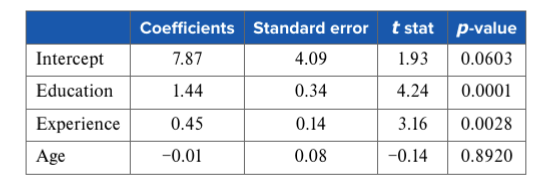

    a)    (1point) what are the estimate for b1, b2

In [ ]:
# Your answer
# From the regression table:
#b1​ (Education) = 1.44
#b2​ (Experience) = 0.45


    b)    (1point) Predict the hourly wage rate for 30-year-old worker with four year of higher education and three years of experience.

In [ ]:
# Your answer
# Wage=7.87+(1.44⋅4)+(0.45⋅3)+(−0.01⋅30)
# Predicted wage = $14.68/hour



---



---



---



5. (total 3 points)Chapter 7 [Business Analytics, 2nd Edition](https://www.mheducation.com/highered/product/business-analytics-lertwachara-chen/M9781264302802.html)

##### Excercise 7.1

6. The director of graduate admission at a large university is analyzing the relationship between scores on the math portion of Graduate Record Examination (GRE) and subsequent performace in graduate school, as measured by student`s avrage (GPA). the accompaanying data file shows GPA and GRE of 24 students.

In [ ]:
import numpy as np
import pandas as pd
gpaDf =  pd.read_excel("https://www.dropbox.com/scl/fi/24jfn2u4rsn6e45bvzkrs/GPA.xlsx?rlkey=9ecqtc90bmntcsucdy8gzyt24&dl=1")
gpaDf

    a) (2points) Find regression model equation for the model: GPA = b0 + B1 GRE

In [ ]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
# Your answer
# GPA=0.426+0.0041⋅GRE

    b) (1 point) what is a student`s prediction GPA if he/she scored 710 on math portion of GRE

In [ ]:
# Your answer
#3.34



---



---



---



6. (totla 3 points)Chapter 7 [Business Analytics, 2nd Edition](https://www.mheducation.com/highered/product/business-analytics-lertwachara-chen/M9781264302802.html)

##### Excercise 7.1

10. The maintenance manager at a trucking company wants to build a regression model to forcast the time unyil the first engine overhaul(Time in years) based on four predictor variables for 25 trucks:
    1. anual miles driven (Miles in 1000s)
    2. avrage load weight (Load in tons)
    3. average driving speed (Speed in mph)
    4. oil change interval (Oil in 1000s of miles).

In [ ]:
import numpy as np
import pandas as pd
engineDf =  pd.read_excel("https://www.dropbox.com/scl/fi/dcoz9yw3f8yywtzy82f4z/Engine.xlsx?rlkey=n53hfjjsrddywktksj156jra5&dl=1")
engineDf.head()

    a) (2 point)find model regression equation (use all four predictor variables)

In [ ]:
# your answer
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
# Time=13.434−0.0896⋅Miles−0.0732⋅Load+0.0048⋅Speed−0.0297⋅Oil
# Miles = Annual miles driven (in 1,000s)
# Load = Average load in tons
# Speed = Average speed in mph
# Oil = Oil change interval (in 1,000s of miles)

    b) (1point) Predict the time before the first engine overhaul for particular truck driven 60000 miles per year with an average load of 22 tons, an average driving speed of 57 mph, and 18000 miles between oil changes.

In [ ]:
# Your answer
# Predicted time until first engine overhaul ≈ 6.19 years

### ✅ Extra 5 Points

To earn these additional points, make sure you:

- Register your model in the registry group using the format:  
  `<lastName>_<studentNumber>_<modelName>`
- Ensure the registered model includes:
  - A proper **transformer**
  - A working **main predictor**
- Confirm that the model can be called through the FastAPI `/dashboard` endpoint using the `predict` function.

> **Note:** These are bonus points that can contribute to improving your final course grade.
